# Systemy inspekcji wizualnej  
## Laboratorium  7 - Detekcja ruchu
dr inż. Łukasz Jeleń

Nazwisko i Imię:  
Nr albumu:  
data wykonania ćwiczenia:  

# 1. Narzędzia  
  
  
Na zjęciach korzystamy z pythnona, a jako środowisko pracy mają Państwo do wyboru Google Colab (https://colab.research.google.com) - wersja online, lub Anaconda Navigator (https://www.anaconda.com/) - wymaga instalacji na własnym komputerze. Są to oczywiście tylko propozycje. 

# 2. Zadania. 
  
## Zadanie 1 - Detekcja zmian w obrazie (odejmowanie zdjęć) 
  
Na wyładzie poświęcownym operacjom na orazach mówiliśmy, że poprzez wyznaczenie różnicy między dwoma obrazami (`cv2.absdiff(src1,src2)`) możemy sprawdzić, czy obiekty na obrazach uległy zmianie.  
  
Do wykonania tego zadania proszę wykorzystać zdjęcia zamieszczone na e-portalu. Należy sprawdzić, czy przedmioty na zdjęciach `3.jpg, 4.jpg, 5.jpg` uległy zmianie lub przesunięciu względem zdjecia `1.jpg` z wykorzystaniem różnicy obrazów. Proszę pamięteć, że najlepszy efekt uzyskamu stosując dodatkowe operacje poprawiające efekt odejmowania: opercje morfologiczne, progowanie.

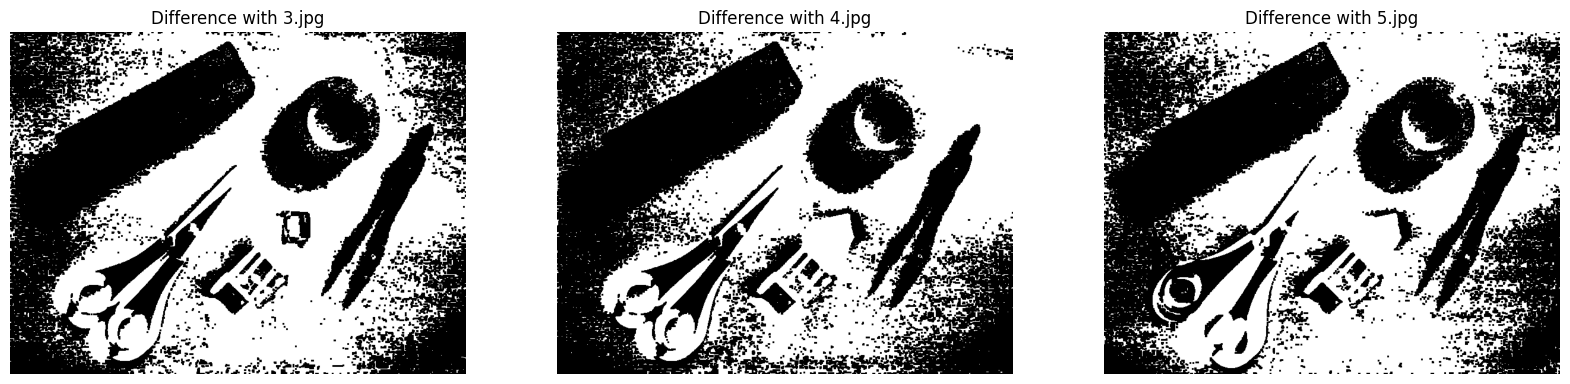

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def process_image(image):
    # Konwersja do skali szarości
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Progowanie
    _, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
    # Operacje morfologiczne
    kernel = np.ones((3,3), np.uint8)
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    return morph

# Wczytanie obrazu referencyjnego
ref_image = cv2.imread('1.jpg')

# Lista do przechowywania wyników
results = []

# Przetwarzanie obrazów do porównania
for i in [3, 4, 5]:
    # Wczytanie obrazu
    comp_image = cv2.imread(f'{i}.jpg')

    # Wyznaczenie różnicy
    diff = cv2.absdiff(ref_image, comp_image)

    # Przetwarzanie różnicy
    processed_diff = process_image(diff)

    # Dodanie wyników do listy
    results.append(processed_diff)

# Wyświetlanie wyników
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for ax, img, title in zip(axes, results, ['Difference with 3.jpg', 'Difference with 4.jpg', 'Difference with 5.jpg']):
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_title(title)
    ax.axis('off')
plt.show()


## Zadanie 2 - Detekcja zmian w obrazie (dzielenie obrzów)

Dzielienie jest kolejną opreacją, którą można wykorzystać w celu detekcji zmian w obrazie.  
  
Do wykonania tego zadania również proszę wykorzystać zdjęcia zamieszczone na e-portalu. Należy sprawdzić, czy przedmioty na zdjęciach 3.jpg, 4.jpg, 5.jpg uległy zmianie lub przesunięciu względem zdjecia 1.jpg z wkorzystaniem ilorazu zdjęć. Proszę pamięteć, że najlepszy efekt uzyskamu stosując dodatkowe operacje poprawiające efekt odejmowania: opercje morfologiczne, progowanie.

## Zadanie 3 - detekcja ruchu

Techniki wykrywania zmian w obrazach możemy łatwo zastosować do stumienia wideo i zbudować detektor ruchu. W tym celu wczytujemy pierwszą ramkę wideo jako ramka referencyjna, a następnie wykonujemy operację odejmowania lub dzielenia ramki referencyjnej przez kolejne. Ogólny schemat można zapisać:


1.   wczytaj wideo 
2.   zamień ramkę na obraz monochromatyczny 
3. zastosuj filtr wygładzający (np. Gaussowaski)
4. dla kolejnej rami powtórz kroki 2 i 3 
5. Odejmij drugą ramkę od pierwszej 
6. zapisz drugą ramkę jako referencyjną 
7. do wynku odejmowania zastosuj operacje morfologiczne i progowanie
8. z obrazu wynikowego wylicz kontury
9. na podstawie konturów oblicz prostokąt okalający (bounding box)
10. nanieś prostokąt na oryginalne wideo.
11. wyświetl wynik


### Detekcja ruchu z kamery
 
Państwa zadaniem jest napisanie prostej aplikacji, która będzie przetwarzać obraz z kamery komputera i poinformuje użytkownika jeśli w obrazie z kamery zostanie wykrytu ruch. Należy wyświetlić stosowny komunikat w konsoli oraz na podglądzie z kamery. 